In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

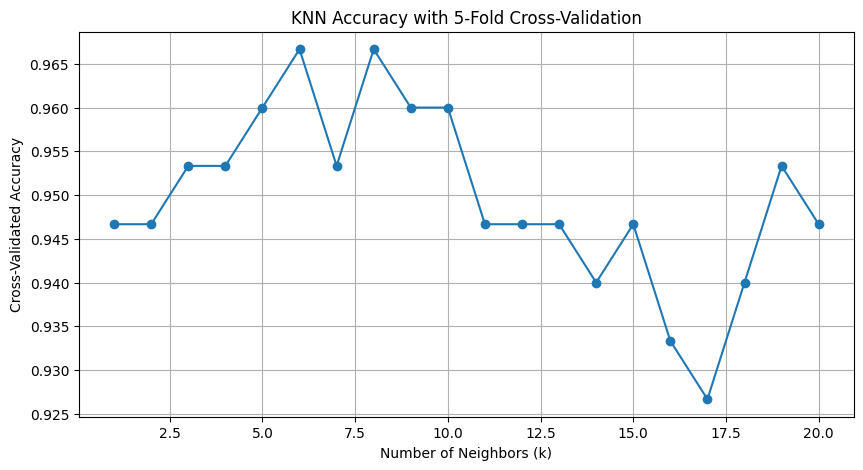

In [6]:
# Plotting the CV accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy with 5-Fold Cross-Validation")
plt.grid(True)
plt.show()

In [7]:
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k: {best_k} with accuracy: {max(cv_scores):.4f}")

Best k: 6 with accuracy: 0.9667


In [8]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
print("Test Accuracy:", best_knn.score(X_test, y_test))

Test Accuracy: 1.0
